# Problem Description

When analysing how a classification model performs, we often make use of a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Through that, we can understand what sort of mistakes the classifier is making. However, a confusion matrix shows absolute values (i.e., how many instances of class X were classified as Y). So, while it's easy to understand what classes present a high error, comparing to the number of instances in that class, it can be labourious to answer questions such as: what's is the class with the higher error rate comparing to all of others? A normalized Confusion Matrix (Confusion Error Matrix) makes that easy.

#### References:
- [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)

<a href="https://colab.research.google.com/github/paulaceccon/ml-helper-scripts/blob/main/notebooks/confusion_error_matrix.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from typing import Optional

%matplotlib inline

In [2]:
def plot_confusion_matrix(y_test: np.ndarray, y_pred: np.ndarray, targets: np.ndarray, error: Optional[bool]=False) -> None:
    """
    This function plots a confusion matrix.
    
    Args:
        y_test: ground truth
        y_pred: predicted targets
        targets : targets' names
    """
    conf_mx = confusion_matrix(y_test, y_pred)
    if error is True:
        row_sums = conf_mx.sum(axis=1, keepdims=True)
        norm_conf_mx = conf_mx / row_sums
        np.fill_diagonal(norm_conf_mx, 0)
        conf_mx = norm_conf_mx
    
    df_cm = pd.DataFrame(conf_mx, index=targets, columns=targets)

    plt.figure(figsize = (5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = preprocessing.StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df = df.apply(pd.to_numeric, args=('coerce',))
for i, v in enumerate(df['target'].unique()):
    df.loc[df["target"]==v, "target"] = iris.target_names[i]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
y_train_pred = clf.predict(X_train)

The confusion matrix shows how accurate a model is.
However, it doesn't easily depicts what sort of error the model is making, relatively to 
all sort of errors present.

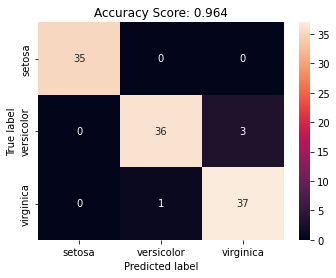

In [6]:
plot_confusion_matrix(y_train, y_train_pred, iris.target_names)

Displaying an error matrix makes that task quite easy.
Now, it's easy to see that the majority of missclassifications comprehends `versicolor` instances classified as `virginia`. 

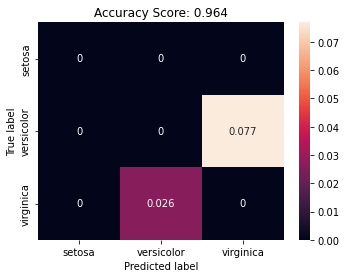

In [7]:
plot_confusion_matrix(y_train, y_train_pred, iris.target_names, error=True)

**Note**: 
sklearn allows the visualization of a [normalized](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) confusion matrix. The difference is that it doesn't fill the diagonal (true positives) with zeros. As for a good model we expect a low error rate, this visualization doesn't highlight the errors.

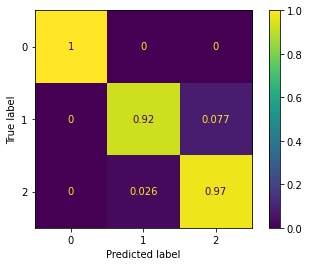

In [8]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true");